# Actividad - Estadística básica

* **Nombre:**
* **Matrícula:**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [ ]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [ ]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
df = pd.read_csv('bestsellers with categories.csv')
df.head(6) 

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [ ]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.

df.describe()


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.max()

Name           You Are a Badass: How to Stop Doubting Your Gr...
Author                                              Zhi Gang Sha
User Rating                                                  4.9
Reviews                                                    87841
Price                                                        105
Year                                                        2019
Genre                                                Non Fiction
dtype: object

In [ ]:
df.min()

Name           10-Day Green Smoothie Cleanse
Author                      Abraham Verghese
User Rating                              3.3
Reviews                                   37
Price                                      0
Year                                    2009
Genre                                Fiction
dtype: object

In [ ]:
df.median()

<ipython-input-10-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

En conclusion lo que nos entregan las variables sobre los datos de media siendo esto el promedio es que para el rating es 4.6, siendo a su vez 11953 reviews, un precio de 13.1, y usando el año de 2014.
En cuanto a la mediana, siendo el dato central; el rating es 4.7, reviews 8580, price de 11 y el año de 2014.

In [ ]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

** Las variables que considero son relevantes son; genero, precio, reviews y rating**

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
* ¿Existen variables que tengan datos extraños?
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

In [ ]:
df.drop(['Name', 'Year', 'Author'], axis = 1)

,User Rating,Reviews,Price,Genre
0,4.7,17350,8,Non Fiction
1,4.6,2052,22,Fiction
2,4.7,18979,15,Non Fiction
3,4.7,21424,6,Fiction
4,4.8,7665,12,Non Fiction
...,...,...,...,...
545,4.9,9413,8,Fiction
546,4.7,14331,8,Non Fiction
547,4.7,14331,8,Non Fiction
548,4.7,14331,8,Non Fiction


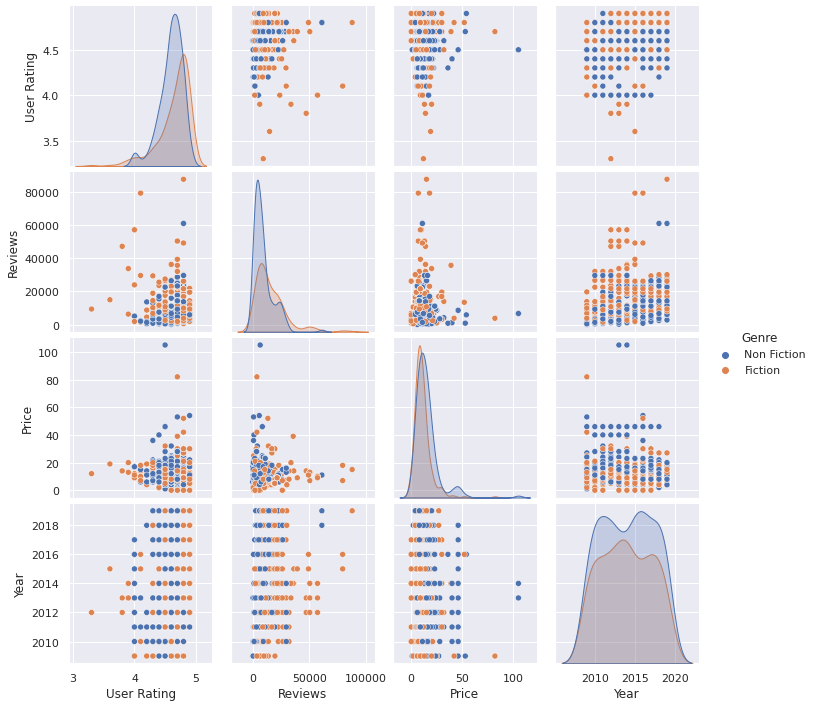

In [ ]:
sns.pairplot(data = df, hue = 'Genre')

Text(0.5, 1.0, 'Histograma de User Rating')

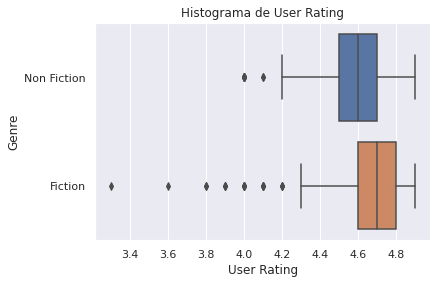

In [ ]:
fig = plt.figure(figsize=(6,4))

# Graficamos 
sns.boxplot(data=df, x='User Rating', y = 'Genre')

# Ejes y título
plt.title('Histograma de User Rating')

Text(0.5, 1.0, 'Histograma de Price')

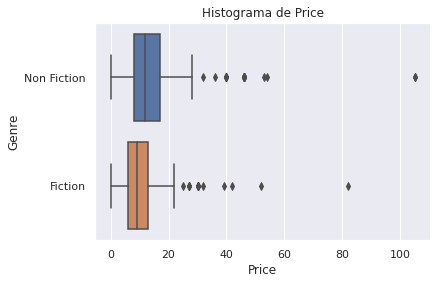

In [18]:
fig = plt.figure(figsize=(6,4))

# Graficamos 
sns.boxplot(data=df, x='Price', y = 'Genre')

# Ejes y título
plt.title('Histograma de Price')

Text(0.5, 1.0, 'Histograma de Reviews')

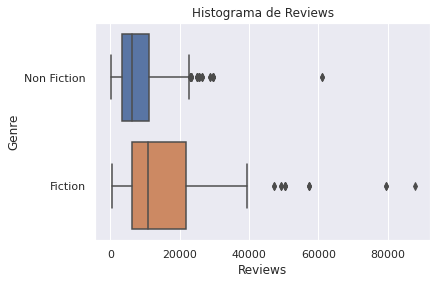

In [19]:
fig = plt.figure(figsize=(6,4))

# Graficamos 
sns.boxplot(data=df, x='Reviews', y = 'Genre')

# Ejes y título
plt.title('Histograma de Reviews')

<Axes: >

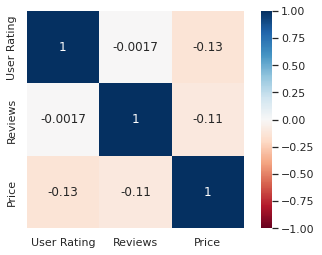

In [21]:
iris_corr = df[['User Rating', 'Reviews', 'Price']].corr()

# Gráfico heatmap. Seleccionamos los valores extremos con vmin y vmax.
# El mapa de color que usaremos es de un extremo azul y del otro rojo.
# Con annot podemos desplegar el valor de cada celda
# Con square hacemos que el gráfico sea simétrico en tamaño de ejes
sns.heatmap(data=iris_corr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

** A mi parecer y como se resolvio en ejercicios anteriores, las variables que en realidad no aportan mucho son year, name y author, porque en realidad no influyen mucho en los datos siendo dos de estas datos de tipo string por lo que no podemos usarlas para analisis y la fecha que en realidad no implica mas nada que solo la fecha en que se publico pero no influye tanto sobre los datos.
Sobre valores extraños, en realidad no encuentro, unicamente hay ciertos desfaces donde los precios son excesivamente altos o al igual que con los reviews que algunos tienen o demasiados o muy pocos.
Si nos basamos en el mapa de calor para conocer cuales variables se encuentran altamente relacionadas podemos observar que donde existe este comportamiento es entre Reviews y Ratings dando a conocer que entre mas reviews tiene un libro mas rating puede obtener ya que le da mas posibilidad de subir cuando tenga menos negativos.
Mencionando lo anterior creo que entre los grupos de datos que se parecen es entre la relacion de user rating con price y reviews con price.
 **

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

In [22]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.
# Seleccionamos las variables a normalizar
numeric_cols = ['Price', 'User Rating',	'Reviews']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Price,User Rating,Reviews
0,-0.470810,0.359990,0.460453
1,0.821609,-0.080978,-0.844786
2,0.175400,0.359990,0.599440
3,-0.655441,0.359990,0.808050
4,-0.101547,0.800958,-0.365880


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Silhouette Score')

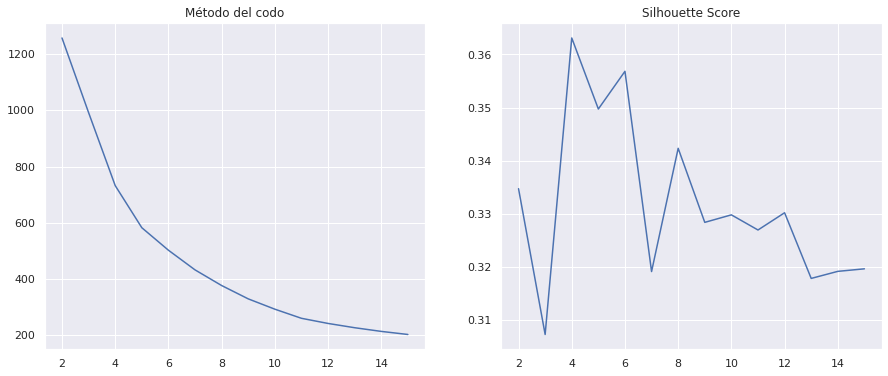

In [33]:
# Declaramos algunos arreglos. Los usuaremos para guardar los valores de la WCSS
 # y la silhouette score
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))
     

# Graficaremos el codo y silhouette score en la misma gráfica. Recorda que 
# subplots nos permite tener más gráficas en la misma figura.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [34]:
# Generamos los 6 grupos
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,2
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,2


**Los centros son representaivo porque al utilizar el metodo para encontrar la k que si es usable se encuentra los datos de grupos necesarios.
Para obtener el valor de K primero se hace un analisis donde se prueba diferentes valores de K luego se grafica con el metodo de codo y de siluette dando a observar cual es el pico mas significativo para encontrar el valor.
Siento que los valores son los mas representativos posible en este momento ya que tomamos el mejor dato posible segun el analisis y al cambiar la cantidad de cluster estos datos varian dando otros analisis que no deseamos.
Si hubiese mas outliers probablemente serian mas considerados que los datos donde realmente es representativo por lo que los centros serian datos muy inconsisos.
Por lo que puedo observar en las graficas pero sobretodo en la 3D, es que el grupo numero 2 es el que mas juntos tiene sus datos mostrando un verdadero equilibrio entre las 3 variables y dando lo mejor de los datos sin tanta dispersion como lo son los otros grupos.**

Text(0.5, 1.05, '4 grupos')

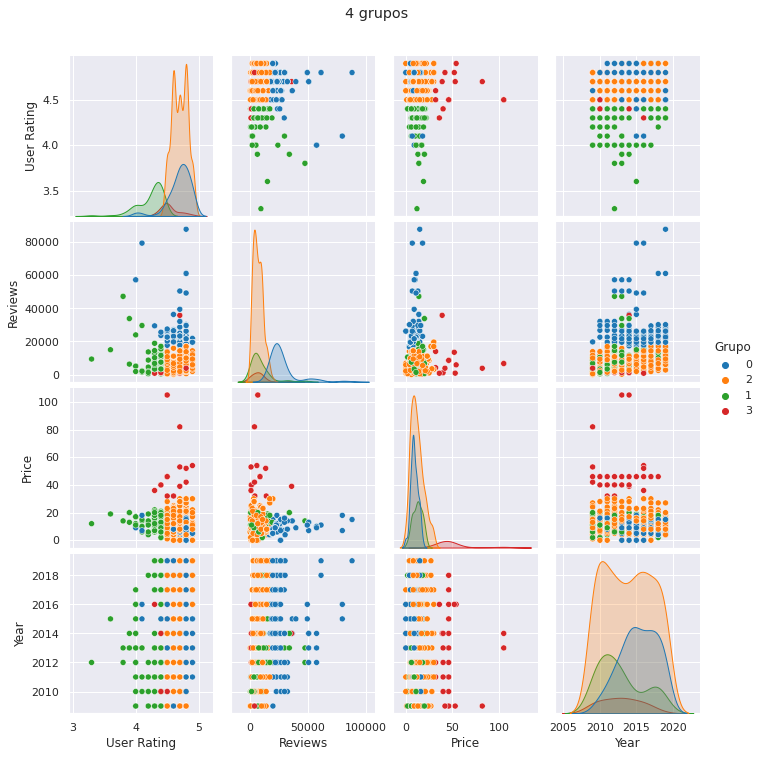

In [35]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.

sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos', y=1.05)

In [36]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.

# Vamos a graficar las 3 variables al mismo tiempo. Para ello, necesitamos 
# importar una librería más
import plotly.express as px

# Creamos la figura donde graficaremos
fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    title='4 grupos',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()




Observando como conclusion final, la grafica 3D nos muestra de manera muy interesante como ciertos grupos se comportan, tomando al naranja como el predilecto a ser el mejor ya que muestra un verdadero equilibro sobre los datos de las variables, luego mostrando al rojo con una minoria de datos visualmente y muy dispersos unos de otros pero a su vez con una fuerte concentracion en price por lo que talvez estos representan los top mas caros. Los del grupo verde al parecer son datos que se apegan mucho a User Rating pero olvidan en su gran parte el price por lo que nos deja al final al grupo azul el cual se enfoca en su mayoria en dos variables siendo estas Reviews y Ratings dejando de lado a price.